In [1]:
import numpy as np
import matplotlib.pyplot as pl
%matplotlib notebook

# Page count distribution

In [2]:
!zgrep '^en' pagecounts-20160105-090000.gz | awk '{print $3}' > counts

In [3]:
counts = np.genfromtxt('./counts', dtype=None)
!rm counts

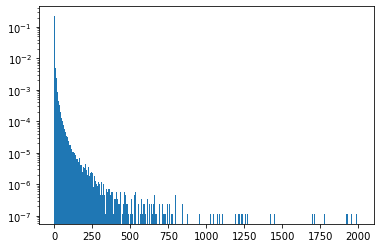

In [4]:
pl.hist(counts, log=True, range=(0,2e3), bins=500, density=True);

# Choosing pages

In [61]:
!gunzip -c ./pagecounts-20160105-090000.gz | awk '/^en / { print $2, $3 }' > ./page_counts

In [62]:
page_counts = np.genfromtxt('./page_counts', dtype=None, delimiter=' ', names=['page','n'])

/nix/store/993n5mfqsp1z1hhy6l028wmkyxhk0dwm-python3-3.7.5-env/lib/python3.7/site-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  """Entry point for launching an IPython kernel.


In [63]:
len(page_counts)

2046139

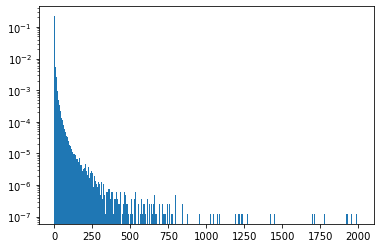

In [64]:
pl.hist(page_counts['n'], log=True, range=(0,2e3), bins=500, density=True);

In [65]:
page_counts = page_counts[np.logical_and(page_counts['n'] > 5, page_counts['n'] < 10000)]

In [66]:
len(page_counts)

158102

In [67]:
!rm ./page_counts

# Drawing sample

In [68]:
page_counts[page_counts['page'] == u'1146']['n'] = 0

In [69]:
n = 1000000
probs = page_counts['n'] / sum(page_counts['n'])
titles = np.random.choice(a=page_counts['page'], size=n, p=probs)

In [70]:
open('titles', 'w').write('\n'.join(titles))

18380165

In [71]:
!wc -l titles


999999 titles


In [72]:
!head -n 10 titles

Vasyl_Lomachenko
Roanoke_Colony
Iron_Man_(disambiguation)
Name_server
Octreotide
Kikuchi_line
Garry_Monk
Bluetooth
Saint_Lucia
The_Cure
